# Importing Required Libraries

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


C:\Users\merug\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\merug\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\merug\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\merug\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [3]:
#for corna 1,0 and non corona 0,1

In [4]:
dataset=r"C:\Users\merug\Desktop\Covid -19 Chest X-ray Detection\Data//"

# Intialize the values 

In [5]:
INIT_LR=1e-3
EPOCHS=10
BS=8


# Creating Data set into Tuple

In [6]:
args={}
args['dataset']=dataset

In [7]:
args

{'dataset': 'C:\\Users\\merug\\Desktop\\Covid -19 Chest X-ray Detection\\Data//'}

# Differntiate the data and labels

In [8]:
import numpy as np
from imutils import paths
import os
import cv2
iPaths = list(paths.list_images(args["dataset"]))
data=[]
labels=[]
for iPath in iPaths:
    label=iPath.split(os.path.sep)[-2]# only the labels of Covid And Normal
    image=cv2.imread(iPath)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #is this step is necessary or not,224 224 size
    image=cv2.resize(image,(224,224))# resize the image into 224,224
    data.append(image)
    labels.append(label)
data=np.array(data)/255.0 #Coverting Values Into Decimals 
labels=np.array(labels)

    

In [19]:
image

array([[[65, 65, 65],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [ 8,  8,  8],
        [ 9,  9,  9]],

       [[68, 68, 68],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [19, 19, 19],
        [13, 13, 13],
        [17, 17, 17]],

       [[67, 67, 67],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [27, 27, 27],
        [20, 20, 20],
        [20, 20, 20]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [20]:
image.shape

(224, 224, 3)

In [21]:
data

array([[[[0.52156863, 0.52156863, 0.52156863],
         [0.47843137, 0.47843137, 0.47843137],
         [0.45098039, 0.45098039, 0.45098039],
         ...,
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.52156863, 0.52156863, 0.52156863],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.41568627, 0.41568627, 0.41568627],
         [0.36470588, 0.36470588, 0.36470588],
         [0.34509804, 0.34509804, 0.34509804],
         ...,
         [0.49411765, 0.49411765, 0.49411765],
         [0.48627451, 0.48627451, 0.48627451],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.21568627, 0.21568627, 0.21568627],
         [0.18039216, 0.18039216, 0.18039216],
         [0.18823529, 0.18823529, 0.18823529],
         ...,
         [0.4745098 , 0.4745098 , 0.4745098 ],
         [0.45490196, 0.45490196, 0.45490196],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[0.96862745, 0.96862745, 0.96862745],
         [0.95294118, 0.95294118, 0.95294118]

In [22]:
labels

array(['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Cov

# Extracting Images Of Covid And Normal

In [25]:
import os
Cimages=os.listdir(dataset+"Covid")
Nimages=os.listdir(dataset+"Normal")

# Plotting Images Of Normal And Covid Images

Normal V Covid -19


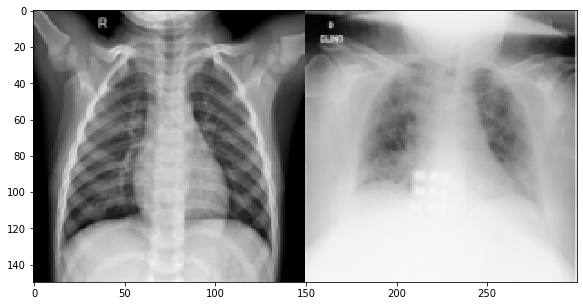

Normal V Covid -19


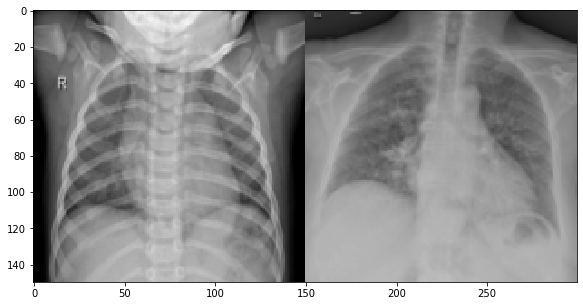

Normal V Covid -19


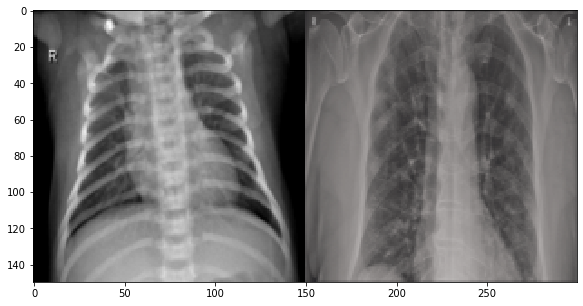

Normal V Covid -19


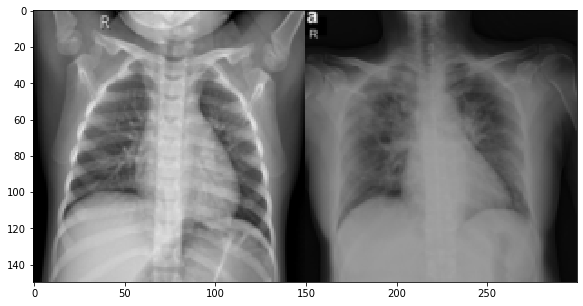

Normal V Covid -19


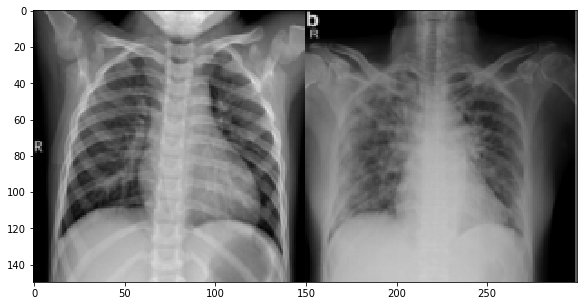

Normal V Covid -19


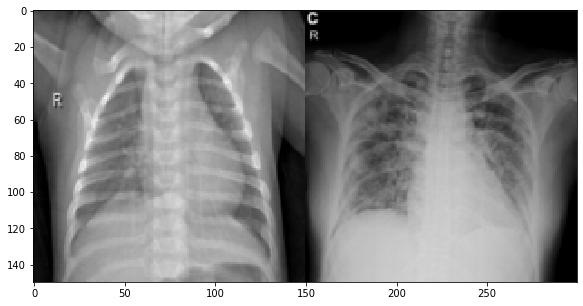

In [29]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
#from skimage transform import resize
def plotter(i):
    normal=cv2.imread(dataset+"Normal//"+Nimages[i])
    normal=skimage.transform.resize(normal,(150,150,3))
    coronovirus=cv2.imread(dataset+"Covid//"+Cimages[i])
    coronovirus=skimage.transform.resize(coronovirus,(150,150,3),mode='reflect')
    pair=np.concatenate((normal,coronovirus),axis=1)
    print("Normal V Covid -19")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,6):
    plotter(i)
    

# Converting Labels Into Binary Format

In [30]:
LB=LabelBinarizer()
labels=LB.fit_transform(labels)
labels=to_categorical(labels)

In [31]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

# Splitting the Data

In [32]:
(X_train,X_test,Y_train,Y_test)= train_test_split(data,labels,test_size=0.20,random_state=42,stratify=labels)#stratify-trains data with same % of data_(0,1) before shuffling and after shuffling remains same amount of (0,1) 

In [33]:
X_train.shape

(160, 224, 224, 3)

In [34]:
Y_train.shape

(160, 2)

# ImageDataGenerator for Gathering more No of Similar Images

In [35]:
trainAug=ImageDataGenerator(rotation_range=(15),fill_mode='nearest')

In [36]:
trainAug

# Using Pretrained Model VGG16 and not Using Top Layer

In [37]:
bmodel=VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

Instructions for updating:
Colocations handled automatically by placer.


In [38]:
bmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Building the model with Pre-Trained Model

In [39]:
hmodel=bmodel.output
hmodel=AveragePooling2D(pool_size=(4,4))(hmodel)
hmodel=Flatten(name='flatten')(hmodel)
hmodel=Dense(64,activation='relu')(hmodel)
hmodel=Dropout(0.5)(hmodel)
hmodel=Dense(2,activation='softmax')(hmodel)
model=Model(bmodel.input,hmodel)

for layer in bmodel.layers:
    layer.trainable=False

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Visualization Of Data  Trained ((1,0)-Covid,(0,1)-Normal)

C:\Users\merug\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


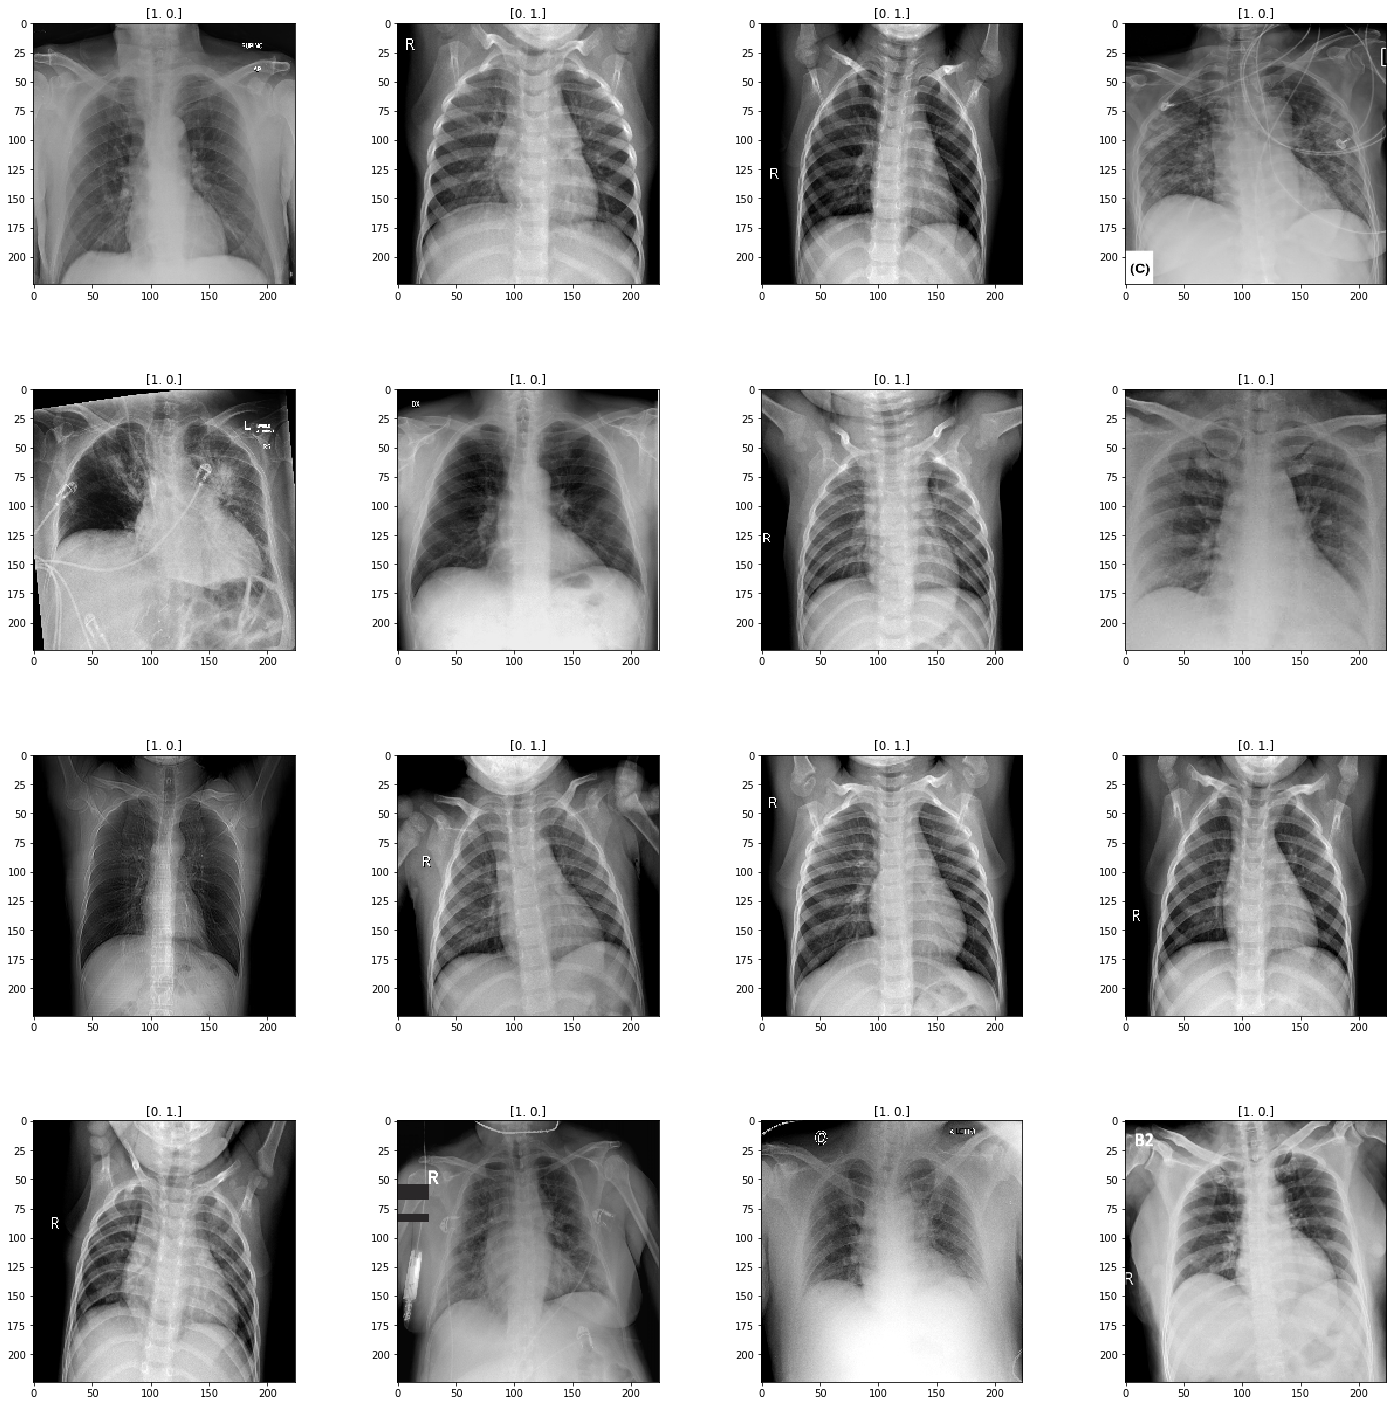

In [41]:
R_grid=4
L_grid=4
fig,axes=plt.subplots(L_grid,R_grid,figsize=(25,25))
axes=axes.ravel()
n_training=len(X_train)
for i in np.arange(0,L_grid*R_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('on')
plt.subplots_adjust(hspace=0.4)


# Compiling the Model With Adam

In [42]:
opt=Adam(lr=INIT_LR,decay=INIT_LR/EPOCHS)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
print("compilation starts")

compilation starts


In [48]:
R=model.fit_generator(trainAug.flow(X_train,Y_train,batch_size=BS),
                        steps_per_epoch=len(X_train)//BS,
                        validation_data=(X_test,Y_test),
                        validation_steps=(X_test)//BS,
                        epochs=EPOCHS
)

Epoch 1/10
20/20 [==============================] - 53s 3s/step - loss: 0.1153 - acc: 0.9750 - val_loss: 0.0831 - val_acc: 1.0000
Epoch 2/10
20/20 [==============================] - 54s 3s/step - loss: 0.1075 - acc: 0.9875 - val_loss: 0.0750 - val_acc: 1.0000
Epoch 3/10
20/20 [==============================] - 57s 3s/step - loss: 0.0783 - acc: 0.9875 - val_loss: 0.0642 - val_acc: 1.0000
Epoch 4/10
20/20 [==============================] - 58s 3s/step - loss: 0.0653 - acc: 0.9875 - val_loss: 0.0565 - val_acc: 1.0000
Epoch 5/10
20/20 [==============================] - 58s 3s/step - loss: 0.0727 - acc: 0.9937 - val_loss: 0.0541 - val_acc: 1.0000
Epoch 6/10
20/20 [==============================] - 59s 3s/step - loss: 0.0685 - acc: 0.9875 - val_loss: 0.0500 - val_acc: 1.0000
Epoch 7/10
20/20 [==============================] - 59s 3s/step - loss: 0.0550 - acc: 0.9937 - val_loss: 0.0425 - val_acc: 1.0000
Epoch 8/10
20/20 [==============================] - 59s 3s/step - loss: 0.0415 - acc: 1.00

# Visualization Of Model_Predicted Vs True_Image

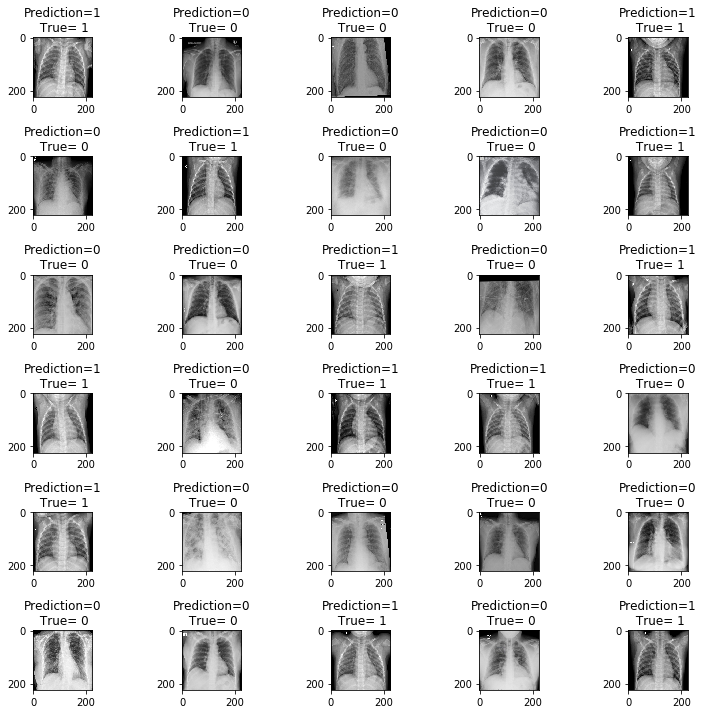

In [44]:
l=6
r=5
fig,axes=plt.subplots(l,r,figsize=(12,12))
axes=axes.ravel()
y_pred=model.predict(X_test,batch_size=BS)
for i in np.arange(0,l*r):
    
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction={}\n True= {}'.format(y_pred.argmax(axis=1)[i],Y_test.argmax(axis=1)[i]))
    axes[i].axis('on')
plt.subplots_adjust(wspace=1,hspace=1)

# Training Model With Classification_report

In [45]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test,batch_size=BS)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(Y_test.argmax(axis=1),y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# Plotting Training_Loss Vs Value_Loss Vs Accuracy_Loss

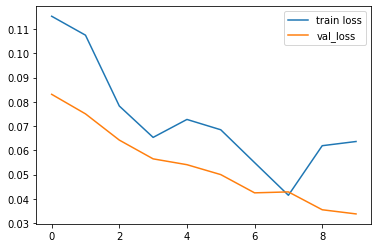

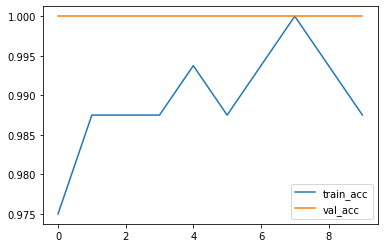

In [54]:
#plot the loss
plt.plot(R.history['loss'],label='train loss')
plt.plot(R.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

#plot the accuracy
plt.plot(R.history['acc'],label='train_acc')
plt.plot(R.history['val_acc'],label='val_acc')
plt.legend()
plt.show()

# Saving Model We Designed

In [56]:
model.save(r'C:\Users\merug\Desktop\Covid -19 Chest X-ray Detection\model.h5')

# Working With Saved Model

In [62]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
model=tf.keras.models.load_model(r'C:\Users\merug\Desktop\Covid -19 Chest X-ray Detection\model.h5')
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load The Image Into The Model

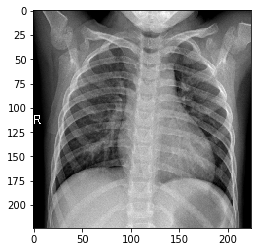

In [76]:
img=image.load_img(r'C:\Users\merug\Desktop\Covid -19 Chest X-ray Detection\Data\Normal\IM-0162-0001.jpeg',target_size=(224,224))
imgplot=plt.imshow(img)

# Image To Array

In [77]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [78]:
x

array([[[[44., 44., 44.],
         [36., 36., 36.],
         [47., 47., 47.],
         ...,
         [37., 37., 37.],
         [34., 34., 34.],
         [36., 36., 36.]],

        [[37., 37., 37.],
         [38., 38., 38.],
         [46., 46., 46.],
         ...,
         [47., 47., 47.],
         [44., 44., 44.],
         [43., 43., 43.]],

        [[36., 36., 36.],
         [38., 38., 38.],
         [41., 41., 41.],
         ...,
         [49., 49., 49.],
         [47., 47., 47.],
         [51., 51., 51.]],

        ...,

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
        

# Preprocessing The Image To Model

In [79]:
img_data=preprocess_input(x) #generally Some Model takes(0,1) or(-1,1)

In [80]:
img_data

array([[[[ -59.939003,  -72.779   ,  -79.68    ],
         [ -67.939   ,  -80.779   ,  -87.68    ],
         [ -56.939003,  -69.779   ,  -76.68    ],
         ...,
         [ -66.939   ,  -79.779   ,  -86.68    ],
         [ -69.939   ,  -82.779   ,  -89.68    ],
         [ -67.939   ,  -80.779   ,  -87.68    ]],

        [[ -66.939   ,  -79.779   ,  -86.68    ],
         [ -65.939   ,  -78.779   ,  -85.68    ],
         [ -57.939003,  -70.779   ,  -77.68    ],
         ...,
         [ -56.939003,  -69.779   ,  -76.68    ],
         [ -59.939003,  -72.779   ,  -79.68    ],
         [ -60.939003,  -73.779   ,  -80.68    ]],

        [[ -67.939   ,  -80.779   ,  -87.68    ],
         [ -65.939   ,  -78.779   ,  -85.68    ],
         [ -62.939003,  -75.779   ,  -82.68    ],
         ...,
         [ -54.939003,  -67.779   ,  -74.68    ],
         [ -56.939003,  -69.779   ,  -76.68    ],
         [ -52.939003,  -65.779   ,  -72.68    ]],

        ...,

        [[-103.939   , -116.779   , -1

# Prediction Of Imported Image

In [82]:
classes=model.predict(img_data)
new_pred=np.argmax(classes,axis=1)

if new_pred ==[1]:
    print("Prediction:Normal")
else:
    print("Prediction:Corona")

Prediction:Normal
